<a href="https://colab.research.google.com/github/sckwokyboom/Cybersemiotics/blob/main/word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework: Multilingual Embedding-based Machine Translation (7 points)

**In this homework** **<font color='red'>YOU</font>** will make machine translation system without using parallel corpora, alignment, attention, 100500 depth super-cool recurrent neural network and all that kind superstuff.

But even without parallel corpora this system can be good enough (hopefully).

For our system we choose two kindred Slavic languages: Ukrainian and Russian.

### Feel the difference!

(_синій кіт_ vs. _синій кит_)

![blue_cat_blue_whale.png](https://github.com/yandexdataschool/nlp_course/raw/master/resources/blue_cat_blue_whale.png)

### Fragment of the Swadesh list for some slavic languages

The Swadesh list is a lexicostatistical stuff. It's named after American linguist Morris Swadesh and contains basic lexis. This list are used to define subgroupings of languages, its relatedness.

So we can see some kind of word invariance for different Slavic languages.


| Russian         | Belorussian              | Ukrainian               | Polish             | Czech                         | Bulgarian            |
|-----------------|--------------------------|-------------------------|--------------------|-------------------------------|-----------------------|
| женщина         | жанчына, кабета, баба    | жінка                   | kobieta            | žena                          | жена                  |
| мужчина         | мужчына                  | чоловік, мужчина        | mężczyzna          | muž                           | мъж                   |
| человек         | чалавек                  | людина, чоловік         | człowiek           | člověk                        | човек                 |
| ребёнок, дитя   | дзіця, дзіцёнак, немаўля | дитина, дитя            | dziecko            | dítě                          | дете                  |
| жена            | жонка                    | дружина, жінка          | żona               | žena, manželka, choť          | съпруга, жена         |
| муж             | муж, гаспадар            | чоловiк, муж            | mąż                | muž, manžel, choť             | съпруг, мъж           |
| мать, мама      | маці, матка              | мати, матір, неня, мама | matka              | matka, máma, 'стар.' mateř    | майка                 |
| отец, тятя      | бацька, тата             | батько, тато, татусь    | ojciec             | otec                          | баща, татко           |
| много           | шмат, багата             | багато                  | wiele              | mnoho, hodně                  | много                 |
| несколько       | некалькі, колькі         | декілька, кілька        | kilka              | několik, pár, trocha          | няколко               |
| другой, иной    | іншы                     | інший                   | inny               | druhý, jiný                   | друг                  |
| зверь, животное | жывёла, звер, істота     | тварина, звір           | zwierzę            | zvíře                         | животно               |
| рыба            | рыба                     | риба                    | ryba               | ryba                          | риба                  |
| птица           | птушка                   | птах, птиця             | ptak               | pták                          | птица                 |
| собака, пёс     | сабака                   | собака, пес             | pies               | pes                           | куче, пес             |
| вошь            | вош                      | воша                    | wesz               | veš                           | въшка                 |
| змея, гад       | змяя                     | змія, гад               | wąż                | had                           | змия                  |
| червь, червяк   | чарвяк                   | хробак, черв'як         | robak              | červ                          | червей                |
| дерево          | дрэва                    | дерево                  | drzewo             | strom, dřevo                  | дърво                 |
| лес             | лес                      | ліс                     | las                | les                           | гора, лес             |
| палка           | кій, палка               | палиця                  | patyk, pręt, pałka | hůl, klacek, prut, kůl, pálka | палка, пръчка, бастун |

But the context distribution of these languages demonstrates even more invariance. And we can use this fact for our for our purposes.

## Data

In [1]:
try:
  import gensim
except ImportError:
  !pip install gensim
import numpy as np
from gensim.models import KeyedVectors
import pandas as pd

Download embeddings here:
* [cc.uk.300.vec.zip](https://yadi.sk/d/9CAeNsJiInoyUA)
* [cc.ru.300.vec.zip](https://yadi.sk/d/3yG0-M4M8fypeQ)

Load embeddings for ukrainian and russian.

In [2]:
!pip3 install wldhx.yadisk-direct

In [3]:
!curl -L $(yadisk-direct https://yadi.sk/d/9CAeNsJiInoyUA) -o cc.uk.300.vec.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  368M  100  368M    0     0  21.9M      0  0:00:16  0:00:16 --:--:-- 26.8M


In [4]:
!curl -L $(yadisk-direct https://yadi.sk/d/3yG0-M4M8fypeQ) -o cc.ru.300.vec.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  378M  100  378M    0     0  16.8M      0  0:00:22  0:00:22 --:--:-- 23.2M


In [5]:
!unzip /content/cc.ru.300.vec.zip -d /content/
!unzip /content/cc.uk.300.vec.zip -d /content/

Archive:  /content/cc.ru.300.vec.zip
  inflating: /content/cc.ru.300.vec  
Archive:  /content/cc.uk.300.vec.zip
  inflating: /content/cc.uk.300.vec  


In [6]:
uk_emb = KeyedVectors.load_word2vec_format("cc.uk.300.vec")

In [7]:
ru_emb = KeyedVectors.load_word2vec_format("cc.ru.300.vec")

In [5]:
ru_emb.most_similar([ru_emb["август"]], topn=10)

[('август', 1.0000001192092896),
 ('июль', 0.9383152723312378),
 ('сентябрь', 0.9240029454231262),
 ('июнь', 0.9222574830055237),
 ('октябрь', 0.9095539450645447),
 ('ноябрь', 0.8930036425590515),
 ('апрель', 0.8729087114334106),
 ('декабрь', 0.8652557730674744),
 ('март', 0.8545795679092407),
 ('февраль', 0.8401415944099426)]

In [6]:
uk_emb.most_similar([uk_emb["серпень"]])

[('серпень', 0.9999998807907104),
 ('липень', 0.9096441268920898),
 ('вересень', 0.9016969203948975),
 ('червень', 0.8992518782615662),
 ('жовтень', 0.8810408115386963),
 ('листопад', 0.8787633180618286),
 ('квітень', 0.8592804670333862),
 ('грудень', 0.8586863279342651),
 ('травень', 0.840811014175415),
 ('лютий', 0.8256431221961975)]

In [7]:
ru_emb.most_similar([uk_emb["серпень"]])

[('Недопустимость', 0.24435284733772278),
 ('конструктивность', 0.23293082416057587),
 ('офор', 0.23256804049015045),
 ('deteydlya', 0.230317160487175),
 ('пресечении', 0.22632381319999695),
 ('одностороннего', 0.22608886659145355),
 ('подход', 0.2230587750673294),
 ('иболее', 0.22003726661205292),
 ('2015Александр', 0.21872766315937042),
 ('конструктивен', 0.21796567738056183)]

Load small dictionaries for correspoinding words pairs as trainset and testset.

In [10]:
def load_word_pairs(filename):
    uk_ru_pairs = []
    uk_vectors = []
    ru_vectors = []
    with open(filename, "r") as inpf:
        for line in inpf:
            uk, ru = line.rstrip().split("\t")
            if uk not in uk_emb or ru not in ru_emb:
                continue
            uk_ru_pairs.append((uk, ru))
            uk_vectors.append(uk_emb[uk])
            ru_vectors.append(ru_emb[ru])
    return uk_ru_pairs, np.array(uk_vectors), np.array(ru_vectors)

In [11]:
uk_ru_train, X_train, Y_train = load_word_pairs("ukr_rus.train.txt")

In [12]:
uk_ru_test, X_test, Y_test = load_word_pairs("ukr_rus.test.txt")

## Embedding space mapping

Let $x_i \in \mathrm{R}^d$ be the distributed representation of word $i$ in the source language, and $y_i \in \mathrm{R}^d$ is the vector representation of its translation. Our purpose is to learn such linear transform $W$ that minimizes euclidian distance between $Wx_i$ and $y_i$ for some subset of word embeddings. Thus we can formulate so-called Procrustes problem:

$$W^*= \arg\min_W \sum_{i=1}^n||Wx_i - y_i||_2$$
or
$$W^*= \arg\min_W ||WX - Y||_F$$

where $||*||_F$ - Frobenius norm.

In Greek mythology, Procrustes or "the stretcher" was a rogue smith and bandit from Attica who attacked people by stretching them or cutting off their legs, so as to force them to fit the size of an iron bed. We make same bad things with source embedding space. Our Procrustean bed is target embedding space.

![embedding_mapping.png](https://github.com/yandexdataschool/nlp_course/raw/master/resources/embedding_mapping.png)

![procrustes.png](https://github.com/yandexdataschool/nlp_course/raw/master/resources/procrustes.png)

But wait...$W^*= \arg\min_W \sum_{i=1}^n||Wx_i - y_i||_2$ looks like simple multiple linear regression (without intercept fit). So let's code.

Коэффициент наклона (w): [0.6]
Смещение (b): 2.2


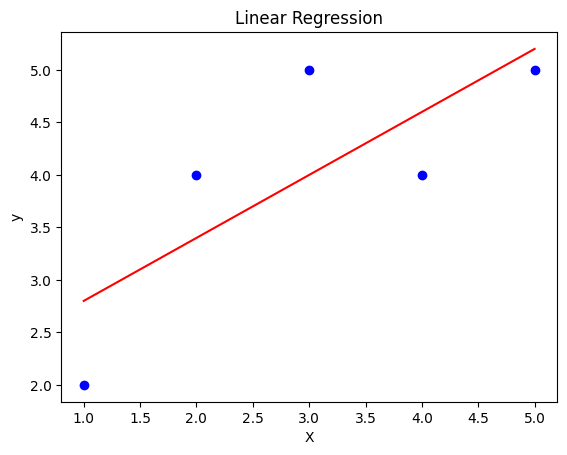

In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Данные: x - признак, y - целевая переменная
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Модель
model = LinearRegression()
model.fit(x, y)

# Предсказание
y_pred = model.predict(x)

# Коэффициенты
print("Коэффициент наклона (w):", model.coef_)
print("Смещение (b):", model.intercept_)
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
mapping = LinearRegression()
mapping.fit(X_train, Y_train)

y_pred = mapping.predict(X_test)
# print(Y_test[0])
# print(y_pred[0])
print("Ожидаемый вектор:\n")
print(ru_emb.most_similar([Y_test[1]]))
print("Предсказанный вектор:\n")
print(ru_emb.most_similar([y_pred[1]]))

Ожидаемый вектор:

[('активный', 1.0000001192092896), ('пассивный', 0.7699531316757202), ('Активный', 0.7216740846633911), ('деятельный', 0.7201953530311584), ('энергичный', 0.691686749458313), ('неактивный', 0.6876639127731323), ('подвижный', 0.6705335974693298), ('здоровый', 0.666638195514679), ('малоактивный', 0.6447054743766785), ('агрессивный', 0.6384122371673584)]
Предсказанный вектор:

[('активный', 0.782060980796814), ('деятельный', 0.6988208889961243), ('энергичный', 0.6481736302375793), ('пассивный', 0.6367382407188416), ('динамичный', 0.6301733255386353), ('спокойный', 0.6236323118209839), ('самостоятельный', 0.6228111386299133), ('прогрессивный', 0.6202723383903503), ('полноценный', 0.6150344610214233), ('обычный', 0.6147060990333557)]


Let's take a look at neigbours of the vector of word _"серпень"_ (_"август"_ in Russian) after linear transform.

In [18]:
august = mapping.predict(uk_emb["серпень"].reshape(1, -1))
ru_emb.most_similar(august)

[('апрель', 0.8541592955589294),
 ('июнь', 0.8411964178085327),
 ('март', 0.8397400379180908),
 ('сентябрь', 0.8359215259552002),
 ('февраль', 0.8328748941421509),
 ('октябрь', 0.8311805725097656),
 ('ноябрь', 0.8278146982192993),
 ('июль', 0.8236351013183594),
 ('август', 0.8120613098144531),
 ('декабрь', 0.8038000464439392)]

We can see that neighbourhood of this embedding cosists of different months, but right variant is on the ninth place.

As quality measure we will use precision top-1, top-5 and top-10 (for each transformed Ukrainian embedding we count how many right target pairs are found in top N nearest neighbours in Russian embedding space).

In [31]:
def precision(pairs, mapped_vectors, topn=1):
    """
    :args:
        pairs = list of right word pairs [(uk_word_0, ru_word_0), ...]
        mapped_vectors = list of embeddings after mapping from source embedding space to destination embedding space
        topn = the number of nearest neighbours in destination embedding space to choose from
    :returns:
        precision_val, float number, total number of words for those we can find right translation at top K.
    """
    assert len(pairs) == len(mapped_vectors)
    num_matches = 0
    for i, (_, ru) in enumerate(pairs):
        ru_prediction_vector = mapped_vectors[i]
        topn_similar_vectors = ru_emb.most_similar(ru_prediction_vector, topn=topn)
        if ru in [x[0] for x in topn_similar_vectors]:
            num_matches += 1
    precision_val = num_matches / len(pairs)
    return precision_val


In [15]:
assert precision([("серпень", "август")], august, topn=5) == 0.0
assert precision([("серпень", "август")], august, topn=9) == 1.0
assert precision([("серпень", "август")], august, topn=10) == 1.0

In [16]:
assert precision(uk_ru_test, X_test) == 0.0
assert precision(uk_ru_test, Y_test) == 1.0

In [17]:
precision_top1 = precision(uk_ru_test, mapping.predict(X_test), 1)
precision_top5 = precision(uk_ru_test, mapping.predict(X_test), 5)

print(precision_top1)
print(precision_top5)
assert precision_top1 >= 0.635
assert precision_top5 >= 0.811

0.6356589147286822
0.8113695090439277


AssertionError: 

## Making it better (orthogonal Procrustean problem)

It can be shown (see original paper) that a self-consistent linear mapping between semantic spaces should be orthogonal.
We can restrict transform $W$ to be orthogonal. Then we will solve next problem:

$$W^*= \arg\min_W ||WX - Y||_F \text{, where: } W^TW = I$$

$$I \text{- identity matrix}$$

Instead of making yet another regression problem we can find optimal orthogonal transformation using singular value decomposition. It turns out that optimal transformation $W^*$ can be expressed via SVD components:
$$X^TY=U\Sigma V^T\text{, singular value decompostion}$$
$$W^*=UV^T$$

In [23]:
def learn_transform(X_train, Y_train):
    """
    :returns: W* : float matrix[emb_dim x emb_dim] as defined in formulae above
    """
    M = X_train.T @ Y_train
    U, _, Vt = np.linalg.svd(M)
    W = U @ Vt
    if np.linalg.det(W) < 0:
        print("det < 0")
        Vt[-1, :] *= -1
        W = U @ Vt
    return W

In [24]:
W = learn_transform(X_train, Y_train)

det < 0


In [59]:
ru_emb.most_similar([np.matmul(uk_emb["серпень"], W)])

[('апрель', 0.8234914541244507),
 ('сентябрь', 0.8045720458030701),
 ('март', 0.8033736348152161),
 ('июнь', 0.8025783896446228),
 ('октябрь', 0.800153374671936),
 ('ноябрь', 0.7940614223480225),
 ('июль', 0.7917209267616272),
 ('февраль', 0.7916903495788574),
 ('август', 0.7884813547134399),
 ('декабрь', 0.7692821621894836)]

In [33]:
# Precisions in multiple linear regression:
#   0.6356589147286822
#   0.8113695090439277
precision_1 = precision(uk_ru_test, np.matmul(X_test, W))
print(precision_1)
assert precision_1 >= 0.651
precision_2 = precision(uk_ru_test, np.matmul(X_test, W), 5)
print(precision_2)
assert precision_2 >= 0.824

0.6511627906976745
0.8294573643410853


## UK-RU Translator

Now we are ready to make simple word-based translator: for each word in source language in shared embedding space we find the nearest in target language.


In [34]:
with open("fairy_tale.txt", "r") as inpf:
    uk_sentences = [line.rstrip().lower() for line in inpf]

In [60]:
import nltk
import string
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def is_word(token):
    return token.isalpha()

def is_punctuation(token):
    return all(char in string.punctuation for char in token)

def smart_join(tokens):
    result = ''
    prev_is_word = False
    for token in tokens:
        if token in string.punctuation or token in ['»', '«', '–', '—', '…']:
          result += token
          result += ' '
          prev_is_word = False
        else:
          if result and prev_is_word:
              result += ' '
          result += token
          prev_is_word = True
    return result

def translate(sentence):
    """
    :args:
        sentence - sentence in Ukrainian (str)
    :returns:
        translation - sentence in Russian (str)

    * find ukrainian embedding for each word in sentence
    * transform ukrainian embedding vector
    * find nearest russian word and replace
    """
    tokens = word_tokenize(sentence)
    translated_tokens = []
    for token in tokens:
        if is_word(token):
            token_lower = token.lower()
            if token_lower not in uk_emb:
                translated_tokens.append(token)
                continue
            uk_emb_word = uk_emb[token_lower]
            ru_emb_word = np.dot(uk_emb_word, W)
            nearest_word = ru_emb.most_similar([ru_emb_word], topn=1)[0][0]
            if token[0].isupper():
                nearest_word = nearest_word.capitalize()
            translated_tokens.append(nearest_word)
        else:
            translated_tokens.append(token)
    return " ".join(translated_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [61]:
assert translate(".") == "."
assert translate("1 , 3") == "1 , 3"
assert translate("кіт зловив мишу") == "кот поймал мышку"

In [57]:
for sentence in uk_sentences:
    print("src: {}\ndst: {}\n".format(sentence, translate(sentence)))

src: лисичка - сестричка і вовк - панібрат
dst: лисичка- сестричка и волк- панібрат

src: як була собі лисичка та зробила хатку, та й живе. а це приходять холоди. от лисичка замерзла та й побігла в село вогню добувать, щоб витопити. прибігає до одної баби та й каже:
dst: как была себе лисичка и сделала избушку, и и живет. а оно приходят морозы. из лисичка замерзшая и и побежала во селение огня добувать, чтобы витопити. прибегает к одной бабы и и говорит: 

src: — здорові були, бабусю! з неділею... позичте мені огню, я вам одслужу.
dst: — здоровые были, бабушку! со воскресеньем ... позичте мне огня, мной тебе одслужу. 

src: — добре, — каже, — лисичко - сестричко. сідай погрійся трохи, поки я пиріжечки повибираю з печі!
dst: — хорошо, — говорит, — лисичко- сестричка. садись погрійся немного, пока мной пирожки повибираю со печи! 

src: а баба макові пиріжки пекла. от баба вибирає пиріжки та на столі кладе, щоб прохололи; а лисичка підгляділа та за пиріг, та з хати... виїла мачок із серед

Not so bad, right? We can easily improve translation using language model and not one but several nearest neighbours in shared embedding space. But next time.

## Would you like to learn more?

### Articles:
* [Exploiting Similarities among Languages for Machine Translation](https://arxiv.org/pdf/1309.4168)  - entry point for multilingual embedding studies by Tomas Mikolov (the author of W2V)
* [Offline bilingual word vectors, orthogonal transformations and the inverted softmax](https://arxiv.org/pdf/1702.03859) - orthogonal transform for unsupervised MT
* [Word Translation Without Parallel Data](https://arxiv.org/pdf/1710.04087)
* [Loss in Translation: Learning Bilingual Word Mapping with a Retrieval Criterion](https://arxiv.org/pdf/1804.07745)
* [Unsupervised Alignment of Embeddings with Wasserstein Procrustes](https://arxiv.org/pdf/1805.11222)

### Repos (with ready-to-use multilingual embeddings):
* https://github.com/facebookresearch/MUSE

* https://github.com/Babylonpartners/fastText_multilingual -